LMS Complexo com toolbox para simplificar as tarefas de processamento de sinais adaptáveis
​​dentro do Python (filtragem, predição, reconstrução, classificação).

In [292]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa

In [293]:
#Gerando dados de entrada

N = 1000

lista = []
lista2 = []
for i in range(N):
    z = complex(np.random.normal(0,1,1),np.random.normal(0,1,1))
    x = eval('z.real')
    y = eval('z.imag')
    lista.append(x)
    lista2.append(y)

# Duas matrizes real e imaginário para os sinais de entrada
complex_signal_r = np.array(lista).reshape(N,1)
complex_signal_i = np.array(lista2).reshape(N, 1)

lista3 = []
lista4 = []
for i in range(N):
     z2 = complex(np.random.normal(0,0.1,1),np.random.normal(0,0.1,1))
     x2 = eval('z2.real')
     y2 = eval('z2.imag')
     lista3.append(x2)
     lista4.append(y2)

# Duas matrizes real e imaginário para o ruído
noise_in_r = np.array(lista3).reshape(N,1)
noise_in_i = np.array(lista4).reshape(N,1)

# Sinal desejado - parte real
d_real =  2*complex_signal_r[:] + 0.1*complex_signal_r[:] - 4*complex_signal_r[:] + 0.5*complex_signal_r[:] + noise_in_r

# Sinal desejado - parte imaginária
d_imag =  2*complex_signal_i[:] + 0.1*complex_signal_i[:] - 4*complex_signal_i[:] + 0.5*complex_signal_i[:] + noise_in_i

In [294]:
# Identificação - Parte Real 
f_r = pa.filters.FilterLMS(n = 1, mu = 0.1 , w = "random")
y_r, e_r, w_r = f_r.run(d_real, complex_signal_r)

# Identificação - Parte Imaginária
f_i = pa.filters.FilterLMS(n = 1, mu = 0.1 , w = "random")
y_i, e_i, w_i = f_i.run(d_imag, complex_signal_i)


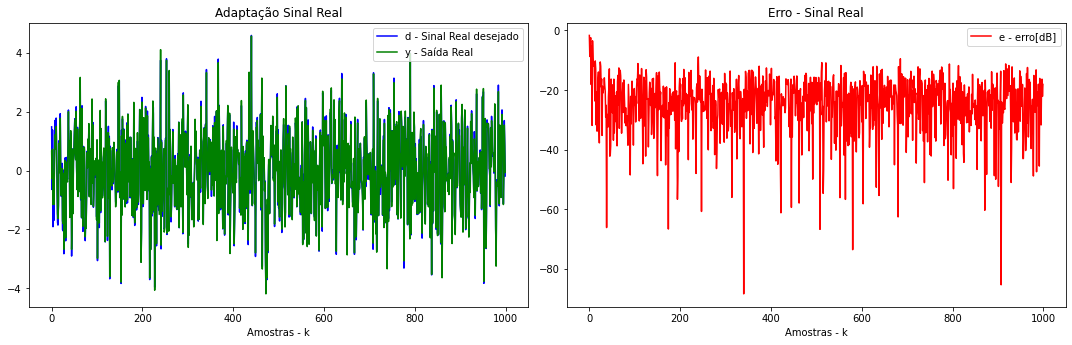

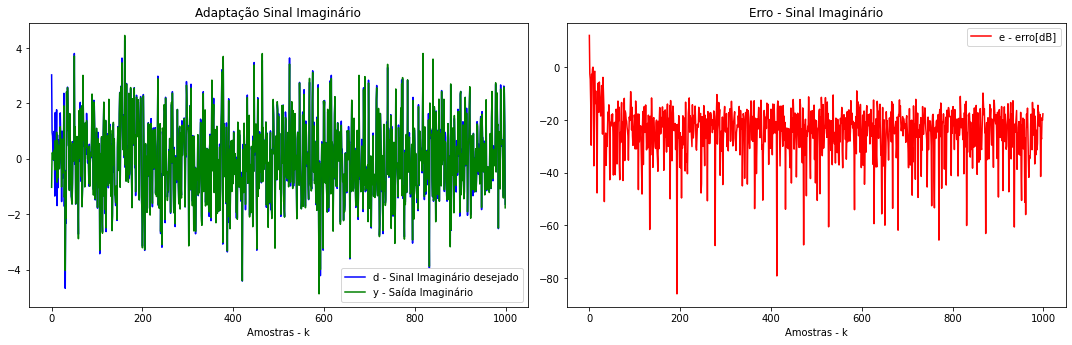

In [295]:
# Plotagem dos resultados - parte real

plt.figure(figsize = (15,9))
plt.subplot(221);plt.title("Adaptação Sinal Real");plt.xlabel("Amostras - k")
plt.plot(d_real, "b", label = "d - Sinal Real desejado")
plt.plot(y_r, "g", label = "y - Saída Real");plt.legend()
plt.subplot(222);plt.title("Erro - Sinal Real");plt.xlabel("Amostras - k")
plt.plot(10*np.log10(e_r**2),"r", label = "e - erro[dB]");plt.legend()
plt.tight_layout()
plt.show()


# Plotagem dos resultados - parte imaginário
plt.figure(figsize = (15,9))
plt.subplot(223);plt.title("Adaptação Sinal Imaginário");plt.xlabel("Amostras - k")
plt.plot(d_imag, "b", label = "d - Sinal Imaginário desejado")
plt.plot(y_i, "g", label = "y - Saída Imaginário");plt.legend()
plt.subplot(224);plt.title("Erro - Sinal Imaginário");plt.xlabel("Amostras - k")
plt.plot(10*np.log10(e_i**2),"r", label = "e - erro[dB]");plt.legend()
plt.tight_layout()
plt.show()